In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares

In [3]:
# Datos experimentales
tiempo = np.array([0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 14, 19, 24, 29, 39])
xdata = np.array([0, 1.4, 6.3, 10.5, 14.2, 17.6, 21.4, 23, 27, 30.5, 34.4, 38.8, 41.6, 43.5, 45.3])

In [4]:
def modelo(t, x, params):
    k1, k2 = params
    a = 126.2
    b = 91.9
    dxdt = [k1*(a - x[0])*(b - x[0])**2 - k2*x[0]**2,
            -(k1*(b - x[0])**2 + 2*k1*(a - x[0])*(b - x[0]) + 2*k2*x[0])*x[1] + (a - x[0])*(b - x[0])**2,
            -(k1*(b - x[0])**2 + 2*k1*(a - x[0])*(b - x[0]) + 2*k2*x[0])*x[2] - x[0]**2]
    return dxdt

def integra(params):
    # Condiciones iniciales
    X0 = [0, 0, 0]
    # Integramos para los mismos tiempos experimentales
    sol = solve_ivp(modelo, (min(tiempo), max(tiempo)), X0, args=(params,), t_eval=tiempo, method='DOP853')
    return sol.y[0] - xdata

# Rutina de optimización least_squares
initial_guess = [1e-5, 1e-3]
results = least_squares(integra, initial_guess)

# Entregamos los resultados
print("Message of convergence:", results.message)
print(f'- Parámetros encontrados (k1, k2): {np.round(results.x,7)}')

Message of convergence: `xtol` termination condition is satisfied.
- Parámetros encontrados (k1, k2): [4.600e-06 2.796e-04]


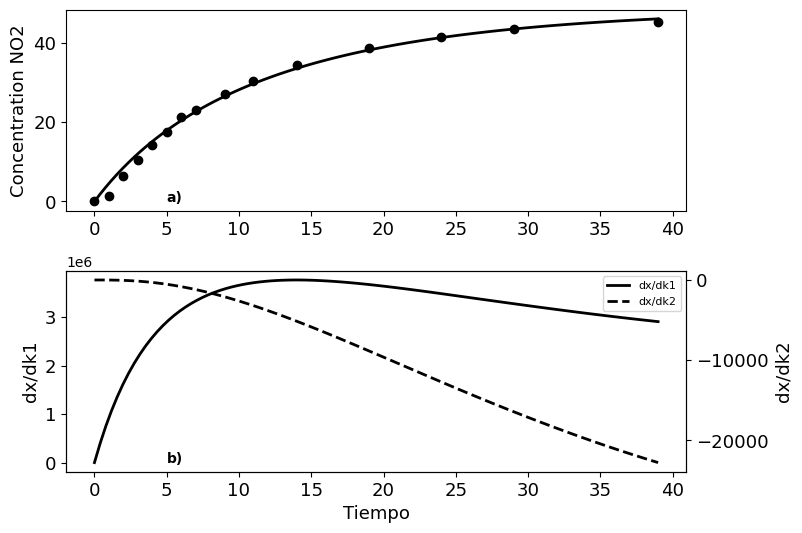

In [5]:
# Simulamos el modelo para los parámetros encontrados
t_sim = np.linspace(0, max(tiempo), 100)
solution = solve_ivp(modelo, (min(tiempo), max(tiempo)), [0, 0, 0], args=(results.x,), t_eval=t_sim)

# Graficamos nuestras soluciones
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo, xdata, 'ko')
plt.plot(t_sim, solution.y[0], 'k-', linewidth=2)
plt.ylabel('Concentration NO2', fontsize=13)
plt.text(5, 0, "a)", fontweight='bold')
plt.tick_params(axis='both', labelsize=13)

plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 2)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(t_sim, solution.y[1], 'k', linewidth=2, label='dx/dk1')
ax2.plot(t_sim, solution.y[2], 'k--', linewidth=2, label='dx/dk2')
ax1.set_xlabel('Tiempo', fontsize=13)
ax1.text(5, 0, "b)", fontweight='bold')
ax1.set_ylabel('dx/dk1', color='k', fontsize=13)
ax2.set_ylabel('dx/dk2', color='k', fontsize=13)
ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best', fontsize=8)
plt.show()